In [1]:
from differences import ATTgt
from matplotlib import pyplot as plt
plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
from panel_utilities import get_value_variable_names, convert_weekly_panel_to_biweekly_panel, prepare_df_for_DiD
from stats_utilities import select_controls, test_balance
from figure_utilities import aggregate_by_event_time_and_plot, aggregate_by_time_and_plot
import pandas as pd



# Store paths.
analysis='group_2_crimes_1000m'
INPUT_DATA = "../../data/03_cleaned/crime_analysis_weekly.parquet"
OUTPUT_FIGURES = f"../../output/{analysis}/figures"
OUTPUT_TABLES = f"../../output/{analysis}/tables"


# Read restricted sample panel dataset into memory.
df = pd.read_parquet(INPUT_DATA)

In [2]:
# Convert weekly panel to biweekly panel.
treatment_date_variable = 'latest_docket_week'
df = df.dropna(subset=treatment_date_variable)
df = convert_weekly_panel_to_biweekly_panel(df, treatment_date_variable, analysis)

# Generate value vars list and month to int dictionaries.
weekly_value_vars_crime, month_to_int_dictionary, int_to_month_dictionary = get_value_variable_names(df, analysis)

In [3]:
covariates_exploration_df = select_controls(df=df, analysis=analysis,
                                            treatment_date_variable=treatment_date_variable,
                                            output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                                                   
                                                 \emph{Independent Variable}                                       
Panel A: Pre-treatment Outcomes                  total_twenty_seventeen_group_2_crimes_1000m       5.544716e-267   
                                                 pre_treatment_change_in_group_2_crimes_1000m      2.995284e-292   
Panel B: Census Tract Characteristics            frac_coll_plus2010                                 2.431151e-88   
                                                 job_density_2013                                   1.083301e-54   
                                                 med_hhinc2016                                      1.048655e-58   
                                                 poor_share2010                                     2.528611e-20   
                                                 popdensity2010                                     4.755420e-69   
Panel C: Case Initiation                         for_cause                                          4.463128e-01   
                                                 no_cause                                           1.593811e-01   
                                                 non_payment                                        1.410574e-01   
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                           6.745135e-01   
                                                 hasAttyP                                           1.309914e-01   
                                                 isEntityD                                          6.735191e-07   
                                                 isEntityP                                          5.261801e-01   

                                                                                                             
                                                                                                             
                                                 \emph{Independent Variable}                                 
Panel A: Pre-treatment Outcomes                  total_twenty_seventeen_group_2_crimes_1000m   1.841270e-01  
                                                 pre_treatment_change_in_group_2_crimes_1000m  5.009986e-01  
Panel B: Census Tract Characteristics            frac_coll_plus2010                            2.196947e-01  
                                                 job_density_2013                              1.019090e-01  
                                                 med_hhinc2016                                 4.881476e-02  
                                                 poor_share2010                                9.587528e-01  
                                                 popdensity2010                                2.446323e-03  
Panel C: Case Initiation                         for_cause                                     1.210370e-09  
                                                 no_cause                                      9.538294e-01  
                                                 non_payment                                   3.799494e-08  
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                      1.768454e-03  
                                                 hasAttyP                                      3.747346e-04  
                                                 isEntityD                                     6.440755e-02  
                                                 isEntityP                                     4.931512e-07

In [4]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                                     Cases Won by Plaintiff   
Panel A total_twenty_seventeen_group_2_crimes_1000m               59.188213   
        pre_treatment_change_in_group_2_crimes_1000m              -0.666033   
Panel B frac_coll_plus2010                                         0.330934   
        job_density_2013                                       17324.753036   
        med_hhinc2016                                          48534.175539   
        poor_share2010                                             0.275051   
        popdensity2010                                         23285.588974   
Panel D isEntityD                                                  0.017110   

                                                     Difference in Cases Won by Defendant  \
                                                                               Unweighted   
Panel A total_twenty_seventeen_group_2_crimes_1000m                              3.581358   
        pre_treatment_change_in_group_2_crimes_1000m                            -0.049770   
Panel B frac_coll_plus2010                                                       0.009828   
        job_density_2013                                                      2509.701466   
        med_hhinc2016                                                         1788.074732   
        poor_share2010                                                          -0.000268   
        popdensity2010                                                        1452.046732   
Panel D isEntityD                                                               -0.009771   

                                                                            \
                                                      \emph{p}    Weighted   
Panel A total_twenty_seventeen_group_2_crimes_1000m   0.184127    0.650532   
        pre_treatment_change_in_group_2_crimes_1000m  0.500999   -0.006823   
Panel B frac_coll_plus2010                            0.219695    0.004172   
        job_density_2013                              0.101909  113.696005   
        med_hhinc2016                                 0.048815  593.733044   
        poor_share2010                                0.958753    0.003911   
        popdensity2010                                0.002446  253.667963   
Panel D isEntityD                                     0.064408    0.000755   

                                                                
                                                      \emph{p}  
Panel A total_twenty_seventeen_group_2_crimes_1000m   0.803717  
        pre_treatment_change_in_group_2_crimes_1000m  0.926055  
Panel B frac_coll_plus2010                            0.598504  
        job_density_2013                              0.936826  
        med_hhinc2016                                 0.493350  
        poor_share2010                                0.444033  
        popdensity2010                                0.516813  
Panel D isEntityD                                     0.872306

In [5]:
# Generate indicators for missing data.

# missing_indicators = add_missing_indicators(df, ['rent_twobed2015'], pre_treatment_covariates)

# Prepare df for use with the differences package.
df = df.reset_index()
df = prepare_df_for_DiD(df=df,
                        analysis=analysis,
                        treatment_date_variable=treatment_date_variable,
                        pre_treatment_covariates=pre_treatment_covariates,
                        missing_indicators=[],
                        value_vars=weekly_value_vars_crime,
                        period_to_int_dictionary=month_to_int_dictionary)

In [6]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_date_variable, freq='2W', base_period='universal')
result = att_gt.fit(formula=analysis, control_group='not_yet_treated', n_jobs=-1)

Computing ATTgt [workers=34]  100%|████████████████████| 17776/17776 [00:57<00:00, 308.92it/s]


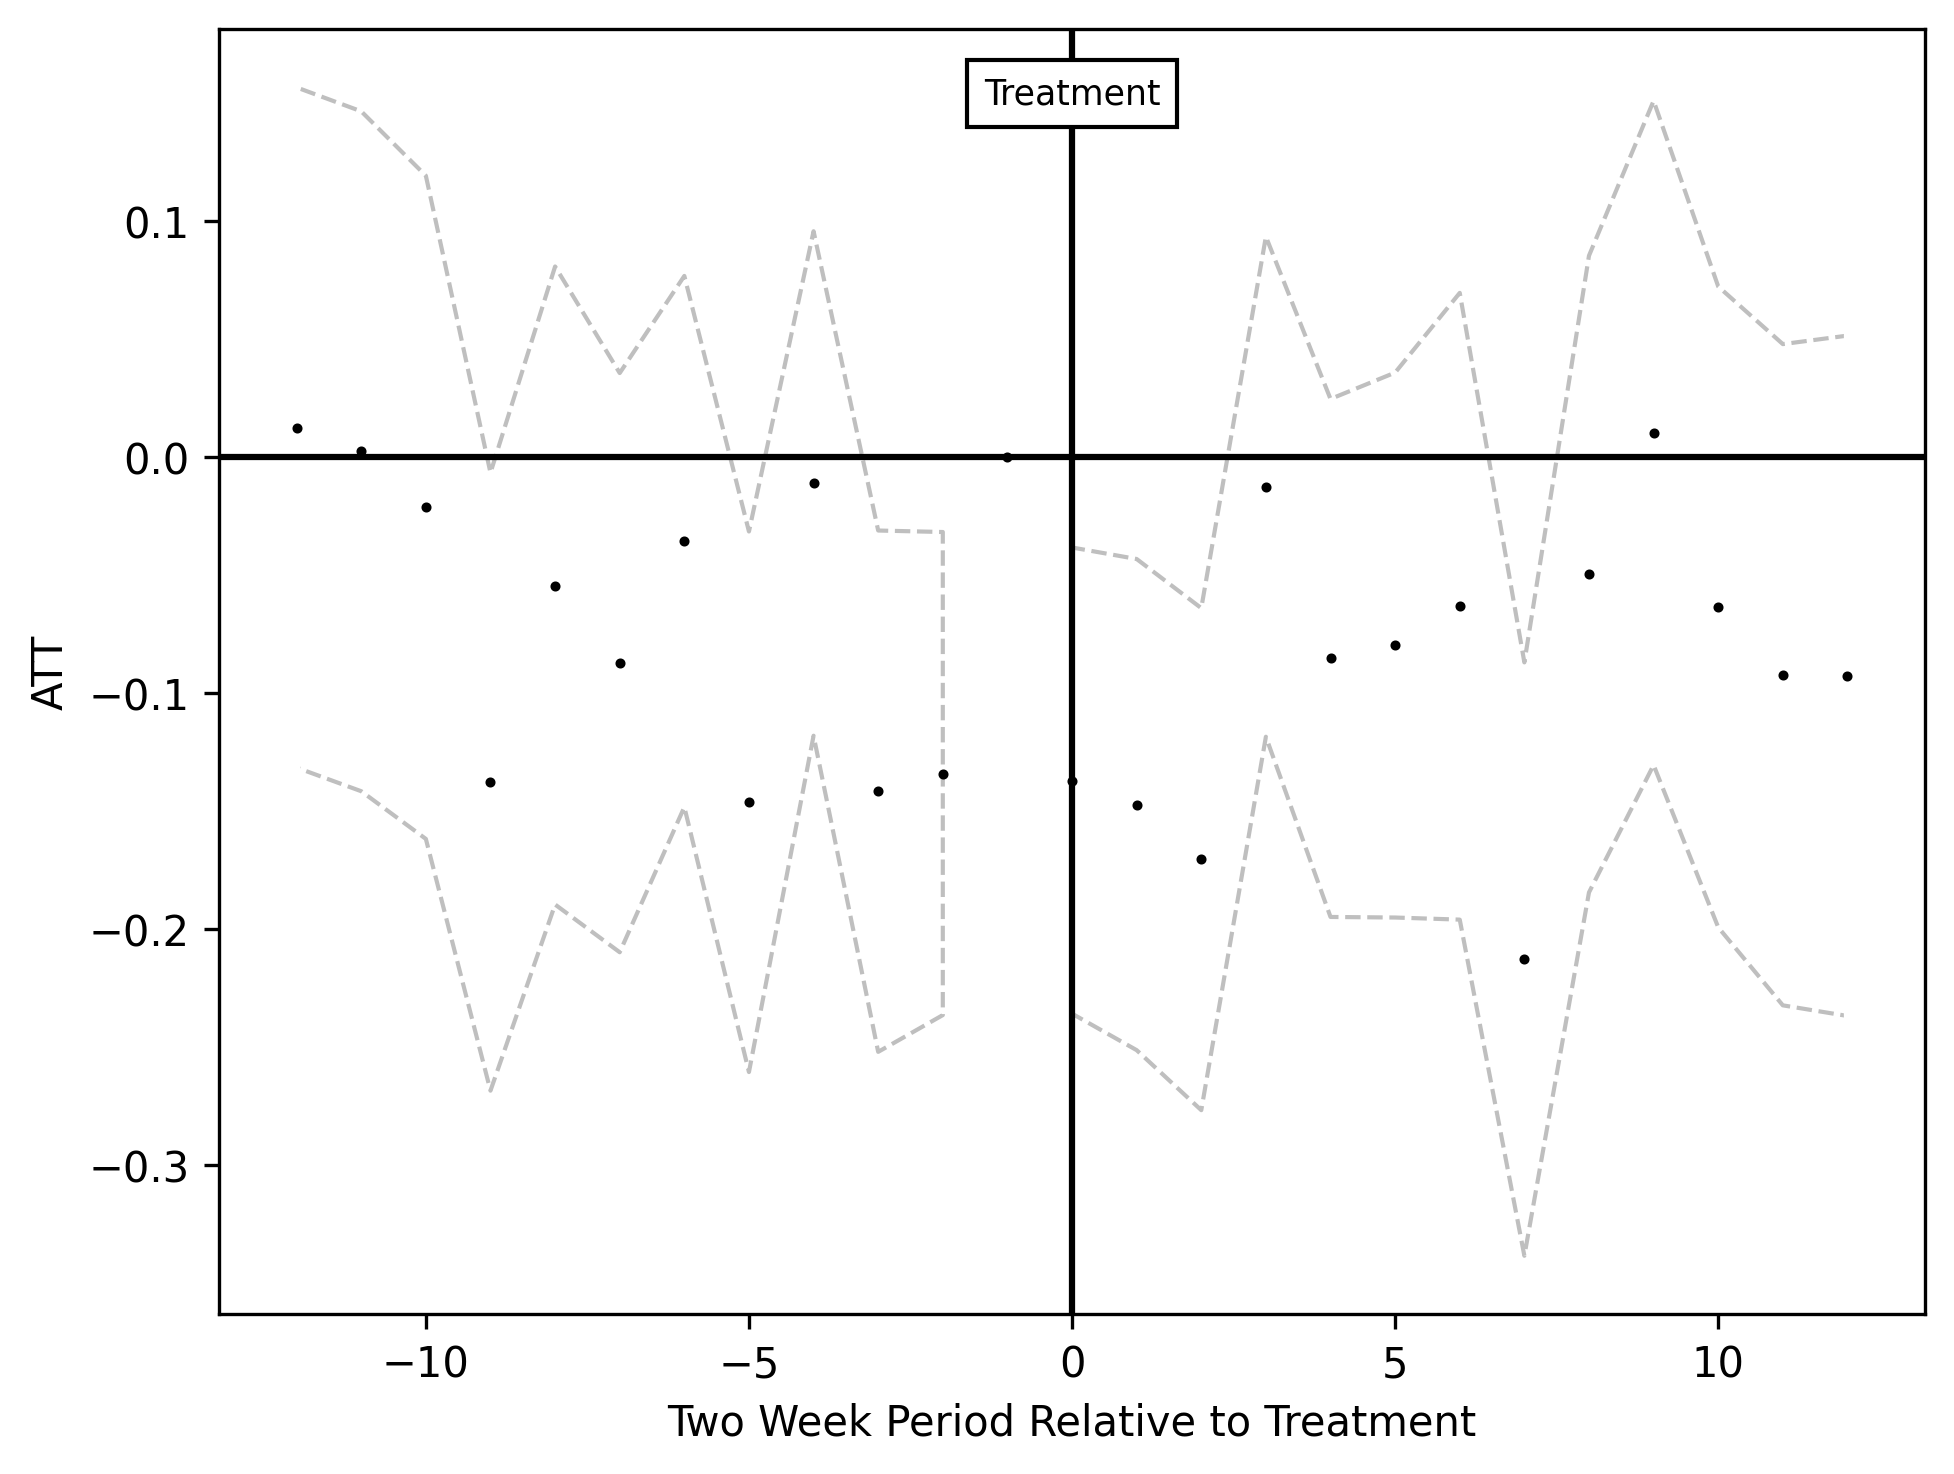

In [7]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-12, end_period=12,
                                 title="",
                                 treatment_month_variable=treatment_date_variable, df=df)

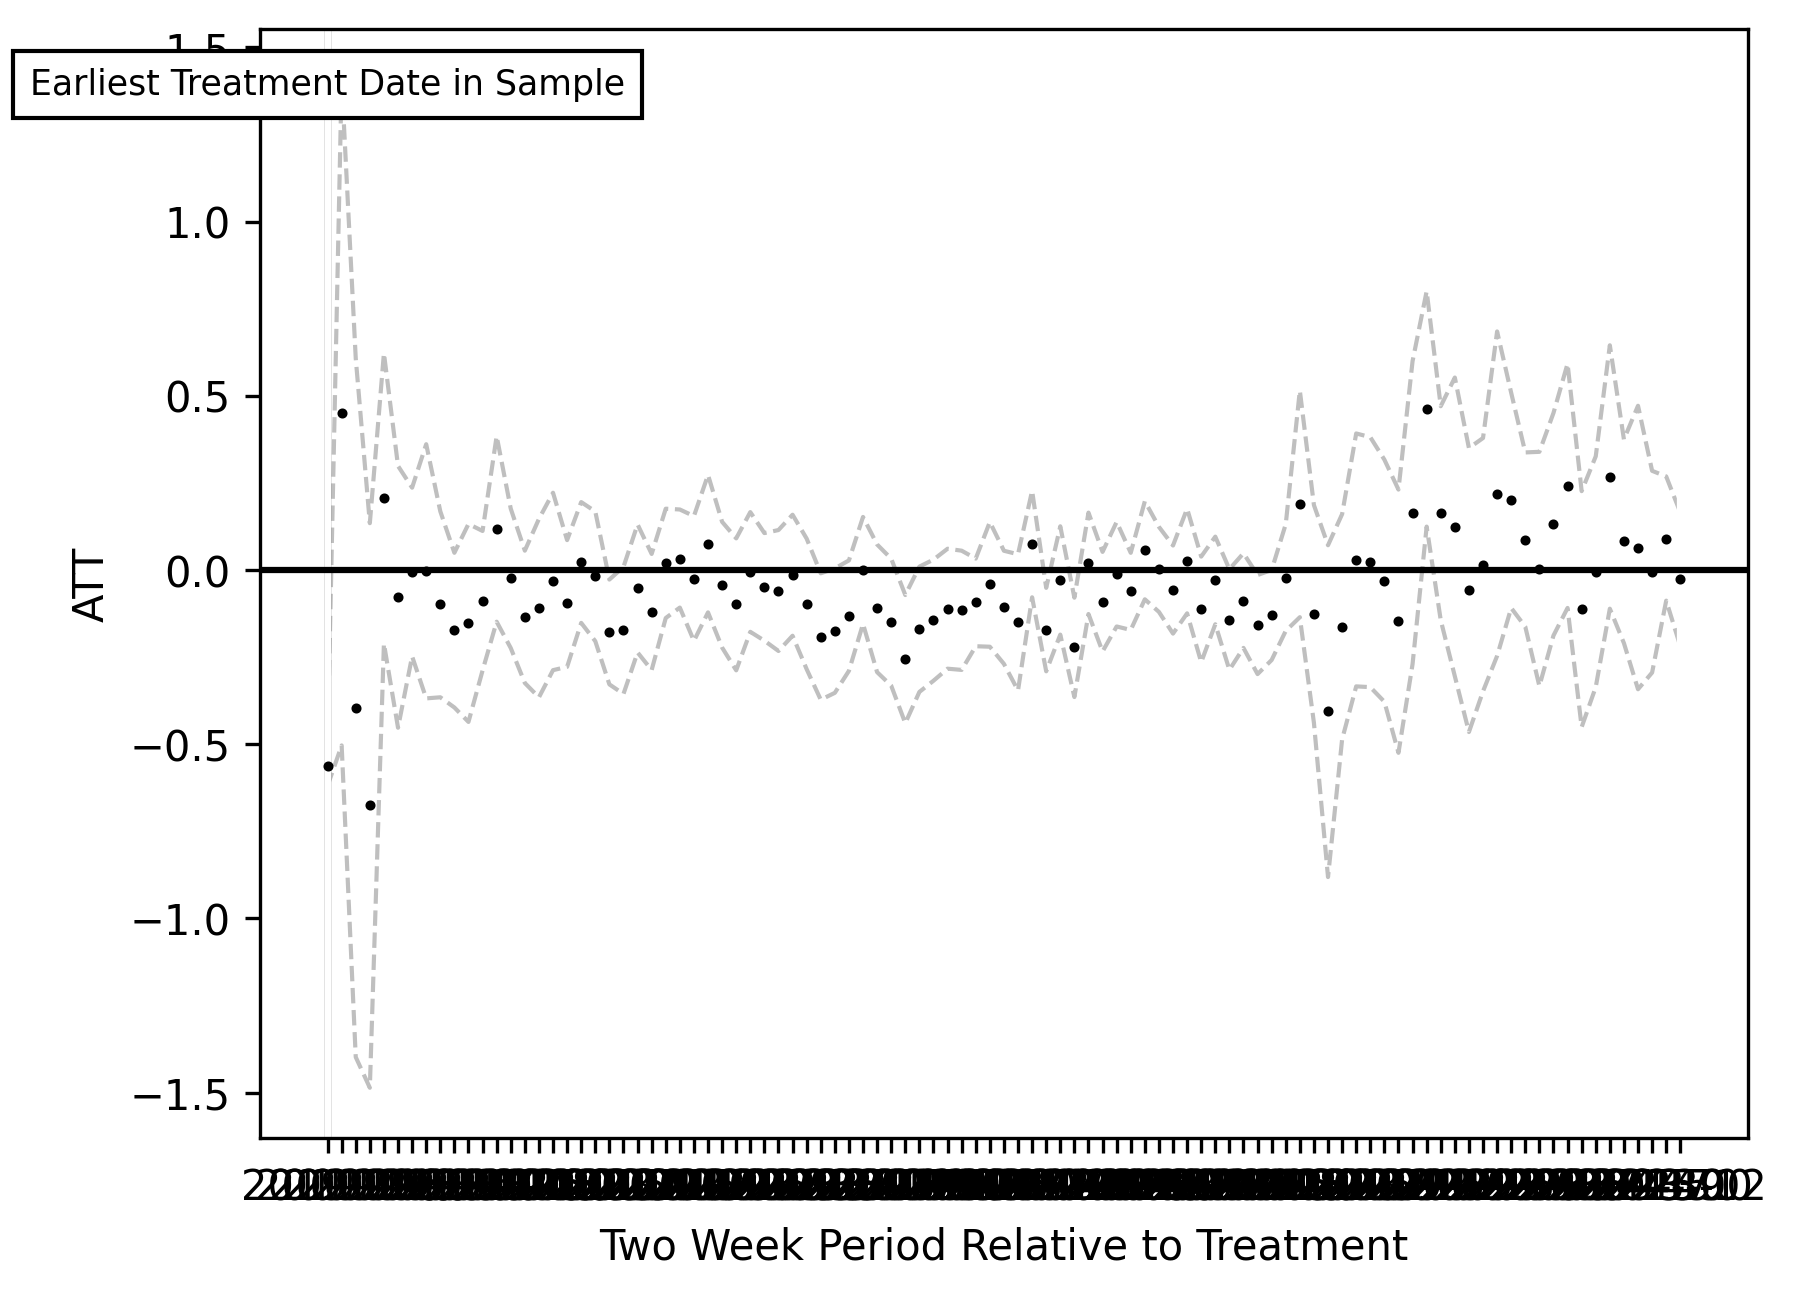

In [8]:
# Plot unconditional ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_unconditional_time.png",
                           title="")

In [9]:
# Run DiD conditional on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_date_variable, freq='M', base_period='universal')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='not_yet_treated', n_jobs=-1, progress_bar=True)

Computing ATTgt [workers=34]   74%|██████████████▊     | 13115/17776 [02:37<00:58, 79.85it/s]/gpfs/home/ashanmu1/seniorthesis/venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
Computing ATTgt [workers=34]   74%|██████████████▊     | 13124/17776 [02:37<01:11, 64.67it/s]/gpfs/home/ashanmu1/seniorthesis/venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/gpfs/home/ashanmu1/seniorthesis/venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/gpfs/home/ashanmu1/seniorthesis/venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/gpfs/home/ashanmu1/seniorthesis/venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow 

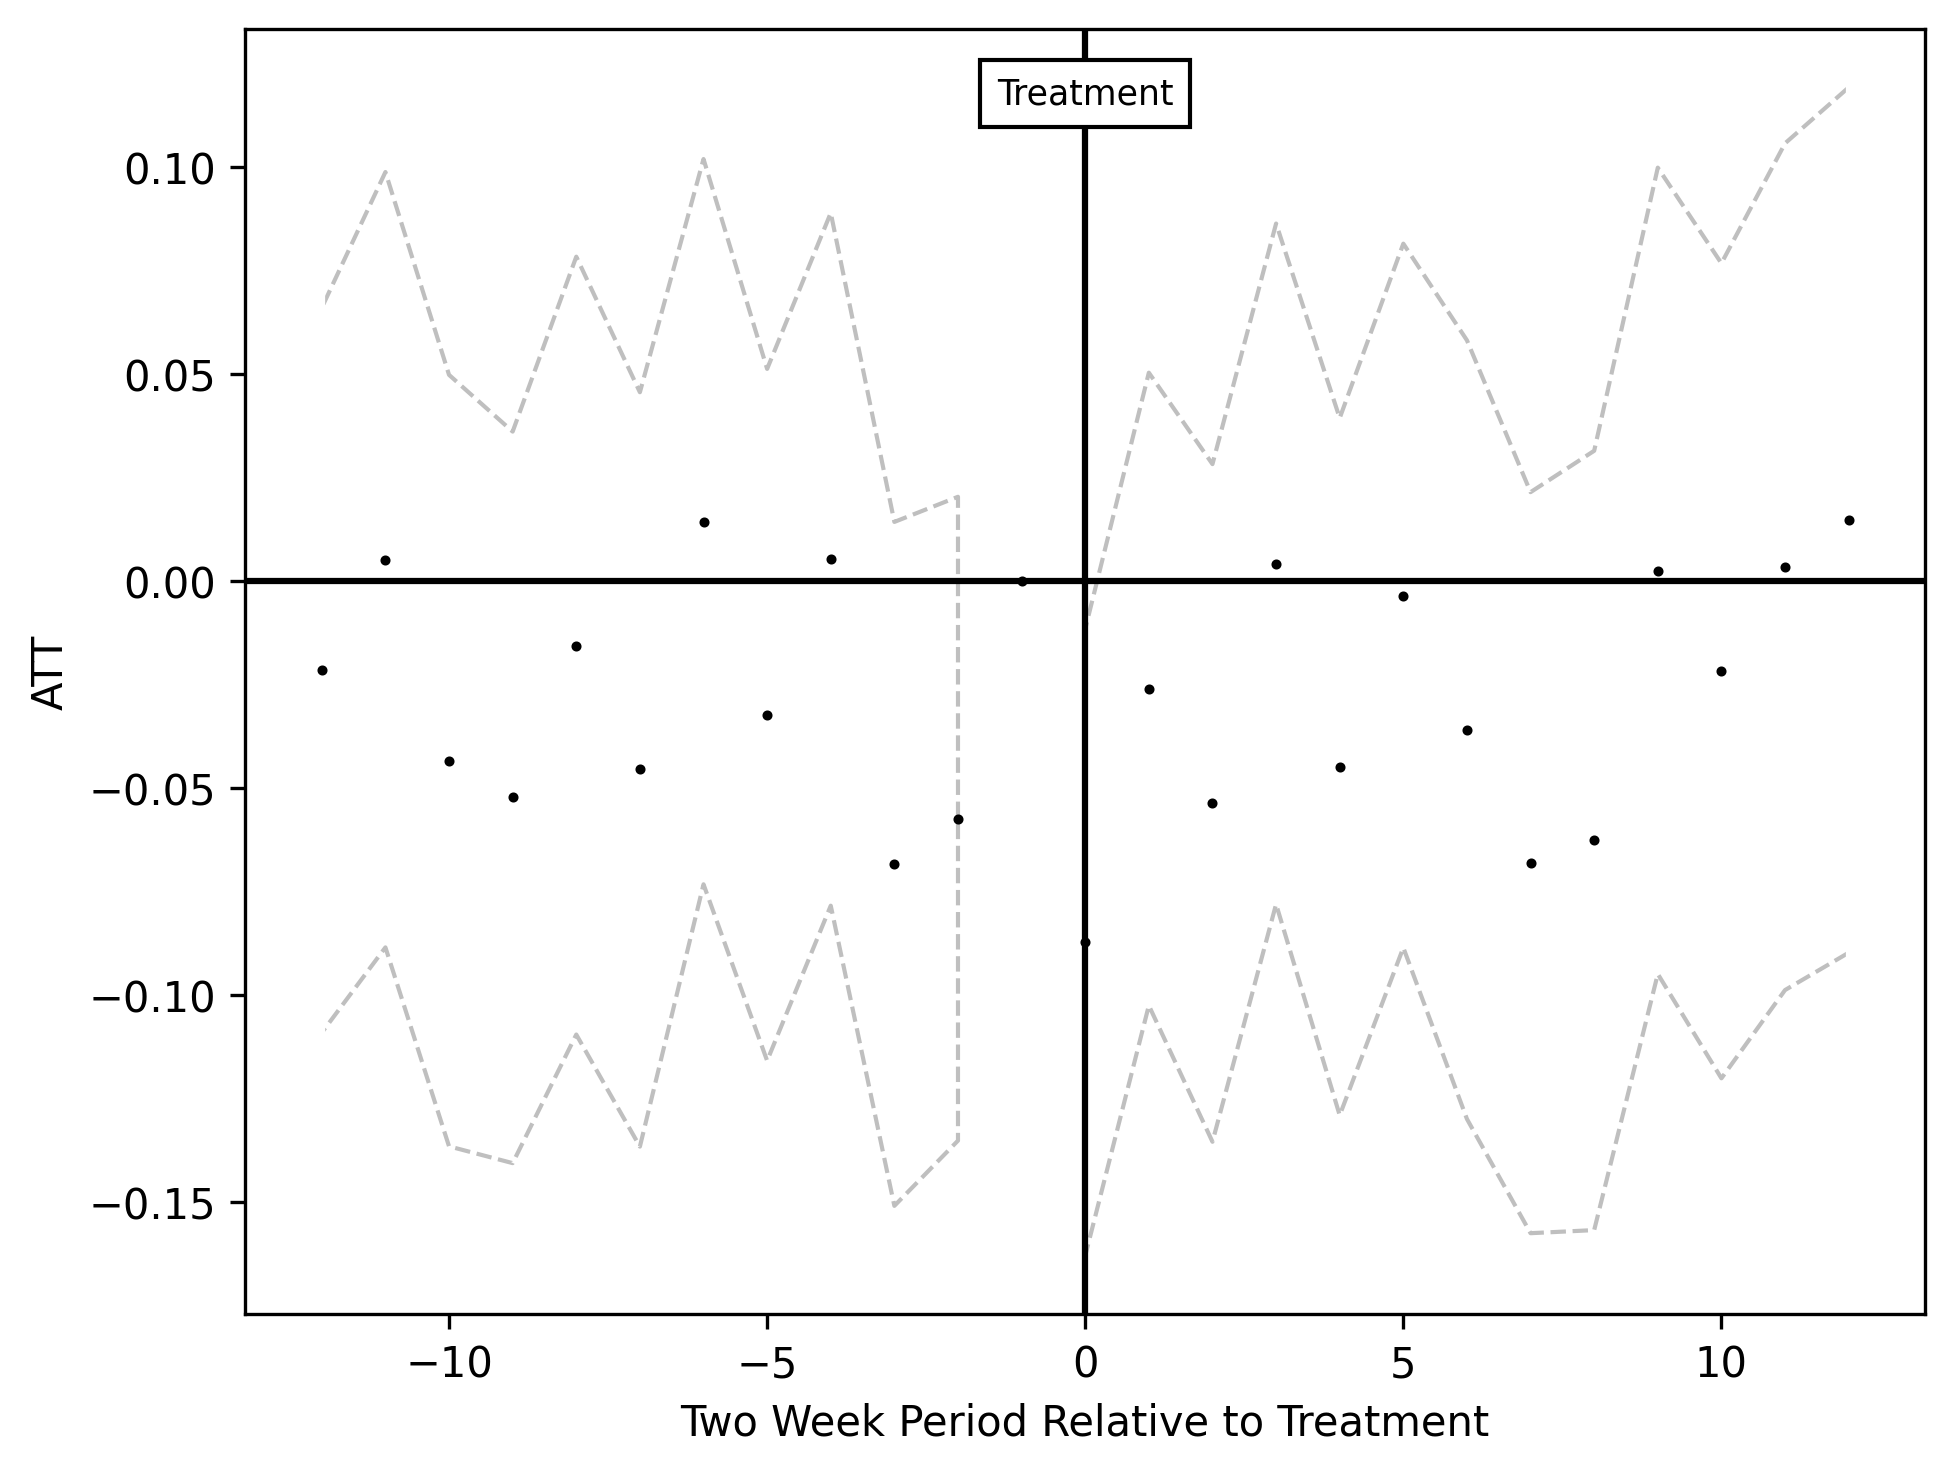

In [10]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-12,
                                 end_period=12,
                                 title="",
                                 treatment_month_variable=treatment_date_variable, df=df)

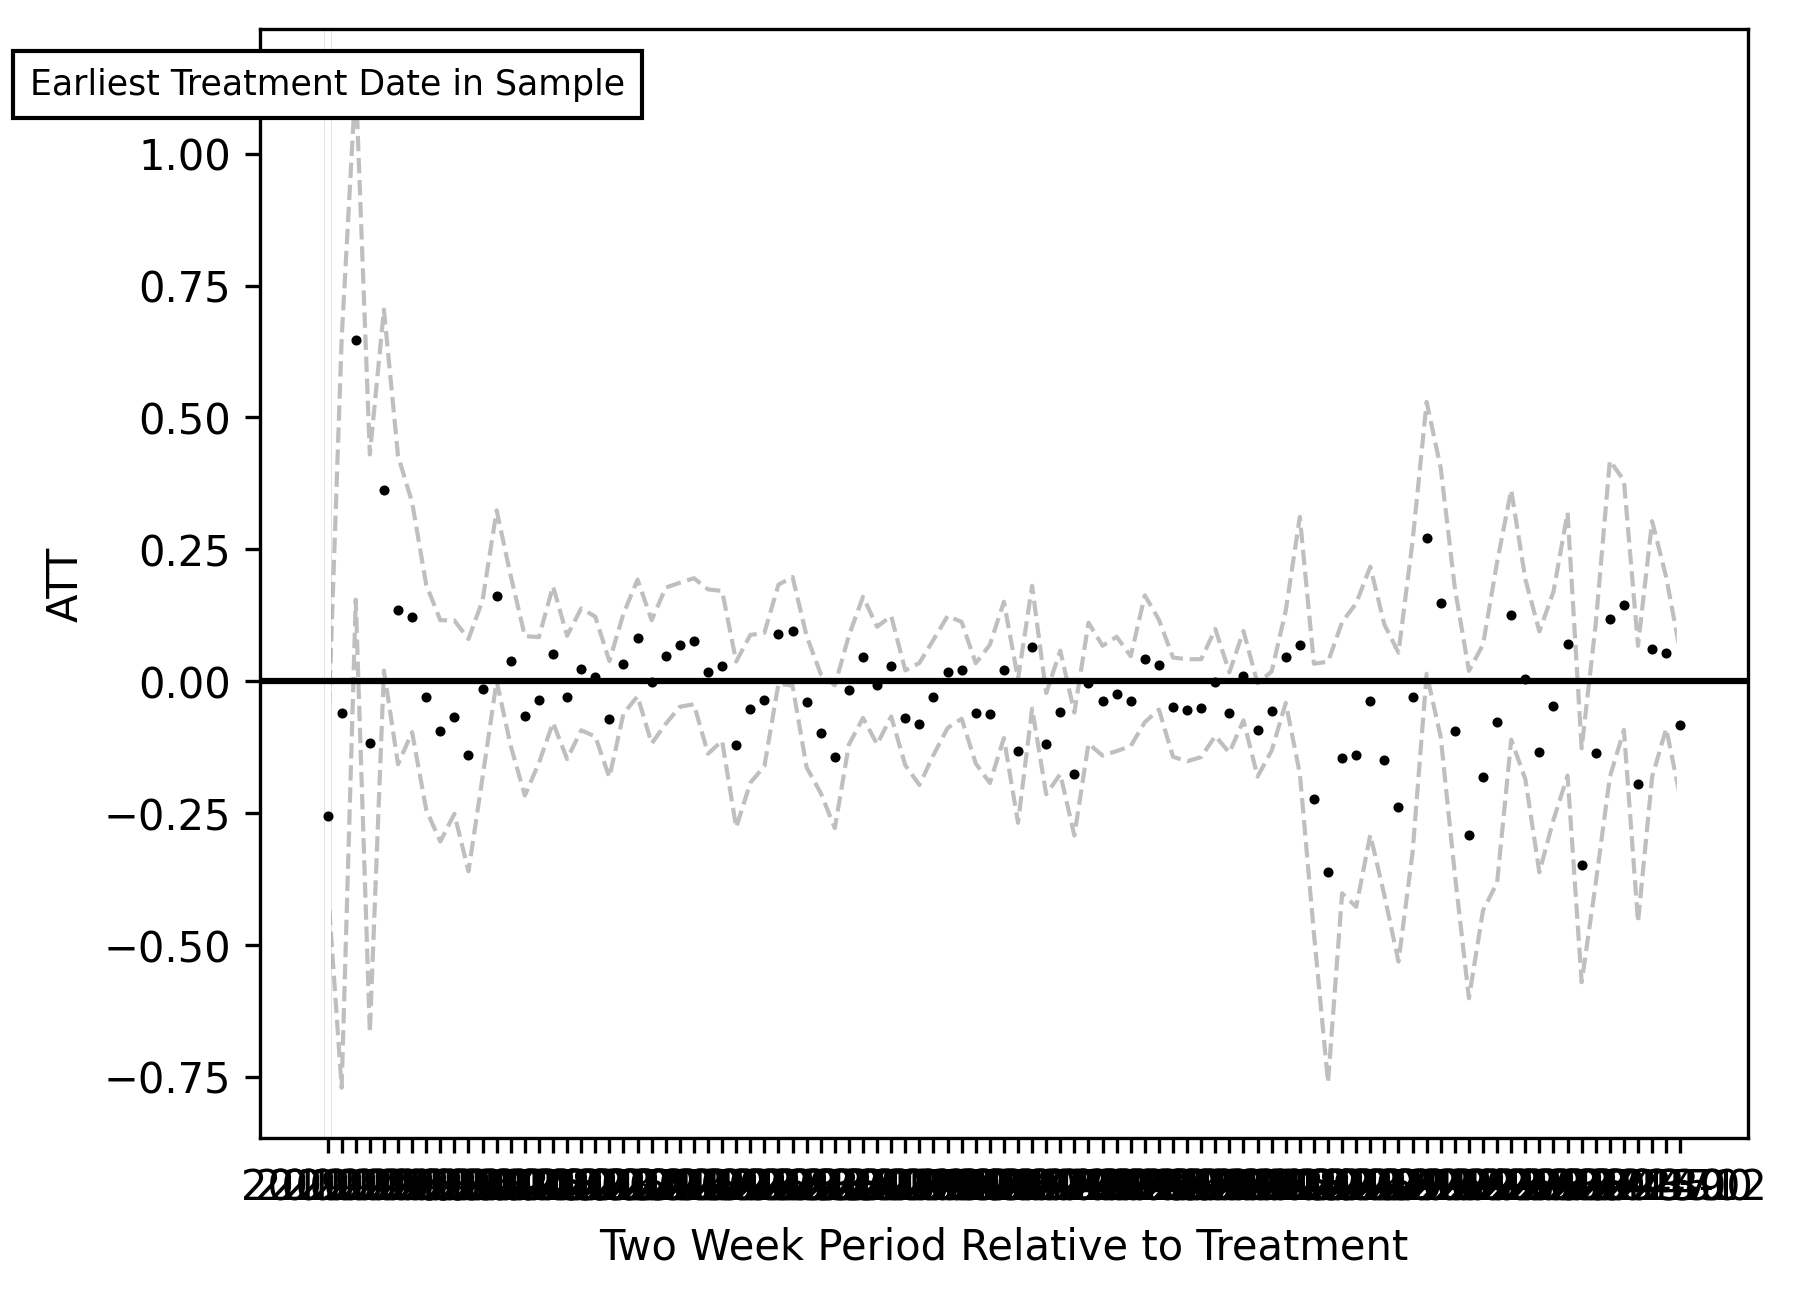

In [11]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="")